In [34]:
import deeplabcut


deeplabcut.create_new_project('Video4','Hannah', [r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4.mp4'],
r'C:\Users\hryu673\Downloads\NEUROHACKATHON')

config_path = r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4-Hannah-2025-05-18\config.yaml'







Project "C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4-Hannah-2025-05-18" already exists!


In [47]:

config_path = r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4-Hannah-2025-05-18\config.yaml'
deeplabcut.extract_frames(config_path)


Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4-Hannah-2025-05-18\videos\Video4.mp4 ?
yes/noyes
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 4.97  seconds.
Extracting and downsampling... 150  frames from the video.


150it [00:04, 30.14it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


[False]

In [48]:
deeplabcut.label_frames(config_path)

In [49]:
deeplabcut.check_labels(config_path)

Creating images with labels by Hannah.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.18it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [50]:
deeplabcut.convertcsv2h5(config_path)

Do you want to convert the csv file in folder: C:\Users\hryu673\Downloads\NEUROHACKATHON\Video4-Hannah-2025-05-18\labeled-data\Video4 ?
yes/noyes


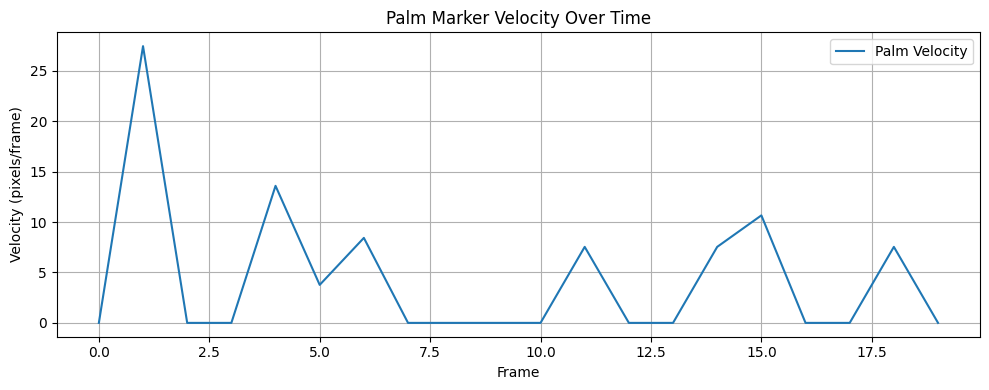

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

csv_path = r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video1-Hannah-2025-05-18\labeled-data\Video1\CollectedData_Hannah.csv'

df = pd.read_csv(csv_path, header=[0, 1, 2])

x = df[('Hannah', 'bodypart1', 'x')].dropna()
y = df[('Hannah', 'bodypart1', 'y')].loc[x.index] 

dx = x.diff().fillna(0)
dy = y.diff().fillna(0)
velocity = np.sqrt(dx**2 + dy**2)


plt.figure(figsize=(10, 4))
plt.plot(velocity.index, velocity, label='Palm Velocity')
plt.xlabel('Frame')
plt.ylabel('Velocity (pixels/frame)')
plt.title('Palm Marker Velocity Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


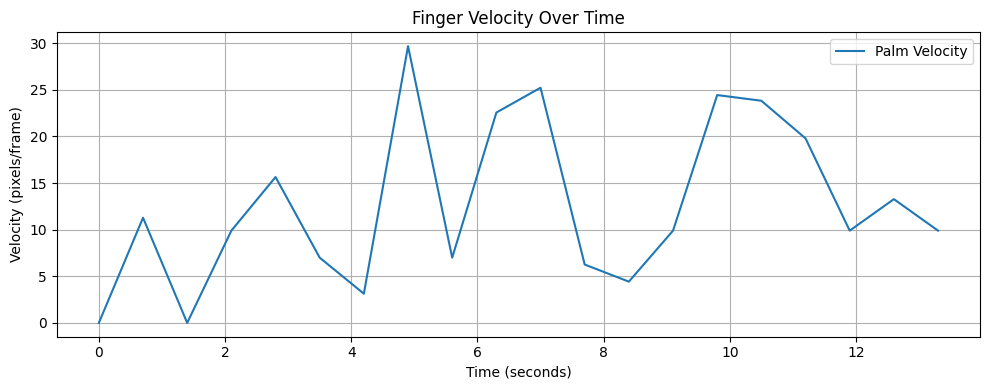

In [53]:
video_duration_sec = 5  
num_frames = len(velocity)
fps = num_frames / video_duration_sec

time_sec = np.arange(num_frames) / fps

plt.figure(figsize=(10, 4))
plt.plot(time_sec, velocity, label='Palm Velocity')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (pixels/frame)')
plt.title('Finger Velocity Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [60]:
import cv2
import numpy as np
import pandas as pd

video_path = r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video1.mp4'
output_path = r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video1_speed_fixedrate.mp4'
csv_path =  r'C:\Users\hryu673\Downloads\NEUROHACKATHON\Video1-Hannah-2025-05-18\labeled-data\Video1\CollectedData_Hannah.csv'

df = pd.read_csv(csv_path, header=[0, 1, 2])
x = df[('Hannah', 'bodypart1', 'x')].dropna()
y = df[('Hannah', 'bodypart1', 'y')].loc[x.index]
velocity = np.sqrt(x.diff().fillna(0)**2 + y.diff().fillna(0)**2).values

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

frames_per_velocity = total_frames // len(velocity)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_w, frame_h))

frame_idx = 0
velocity_idx = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if velocity_idx < len(velocity):
        v = velocity[velocity_idx]
        if frame_idx % frames_per_velocity == 0 and frame_idx != 0:
            velocity_idx += 1
        if velocity_idx >= len(velocity):
            v = velocity[-1] 
    else:
        v = velocity[-1]


    cv2.putText(frame, f"Velocity: {v:.2f} px/frame", (30, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    out.write(frame)
    frame_idx += 1

cap.release()
out.release()
print("success")


 Output saved to: C:\Users\hryu673\Downloads\NEUROHACKATHON\Video1_speed_fixedrate.mp4
